In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [169]:
data =pd.read_csv("D:/@VISHWAS DATA SCIENTIST WORKING/mysql/Customers/churn_analysis.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Replacing Blanks with 0 as tenure is 0 & no Total charges are recorded 

In [16]:
data["TotalCharges"] = data["TotalCharges"].replace(" ","0")
data["TotalCharges"] = data["TotalCharges"].astype("float")

# Now checking the structure of data 

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Lets check how many null values in the data

In [19]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# using describe for taking descriptive analysis

In [20]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


# to check duplicate values

In [21]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

In [26]:
data.duplicated().sum()

np.int64(0)

In [30]:
data["customerID"].duplicated().sum()                          #to check duplicates on primary key column

np.int64(0)

# Converted 0 and 1 values of senior citizen to yes/no to make it easier to understand

In [36]:
def conv(value):
    if value == 1:
        return "Yes"
    else: 
        return "No"
data['SeniorCitizen']= data['SeniorCitizen'].apply(conv)

In [37]:
data.head(30)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,No,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,No,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,No,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


# Now starts our Churn Analysis

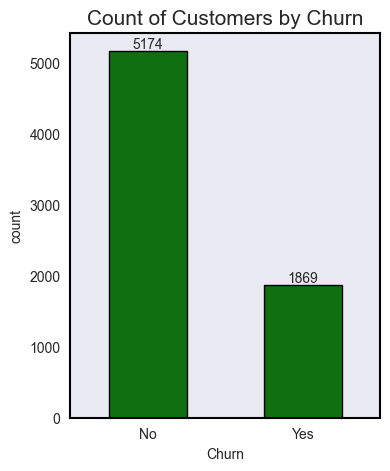

In [334]:
plt.figure(figsize=(4,5))
ax = sns.countplot(data=data,x="Churn",color="green",width=0.5,edgecolor="black")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn",fontsize=15)
plt.gca().spines['top'].set_edgecolor('black')
plt.gca().spines['top'].set_linewidth(1.5)
plt.gca().spines['bottom'].set_edgecolor('black')
plt.gca().spines['bottom'].set_linewidth(1.5)
plt.gca().spines['left'].set_edgecolor('black')
plt.gca().spines['left'].set_linewidth(1.5)
plt.gca().spines['right'].set_edgecolor('black')
plt.gca().spines['right'].set_linewidth(1.5)
plt.show()

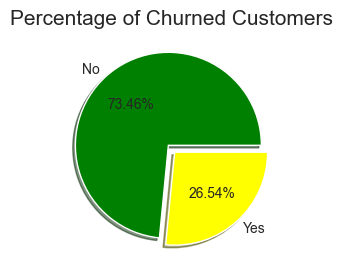

In [341]:
gpby = data.groupby("Churn").agg({'Churn': "count"})
col = ["green","yellow"]
highlight = [0.05,0.05] 
plt.figure(figsize=[3,4])
plt.pie(gpby['Churn'],labels= gpby.index, autopct="%1.2f%%",shadow="true",explode=highlight,colors=col)
plt.title("Percentage of Churned Customers",fontsize=15)
plt.show()

#From the above pie chart we can conclude that 26.54% of customers have churned out.  #Let's explore the reason behind it

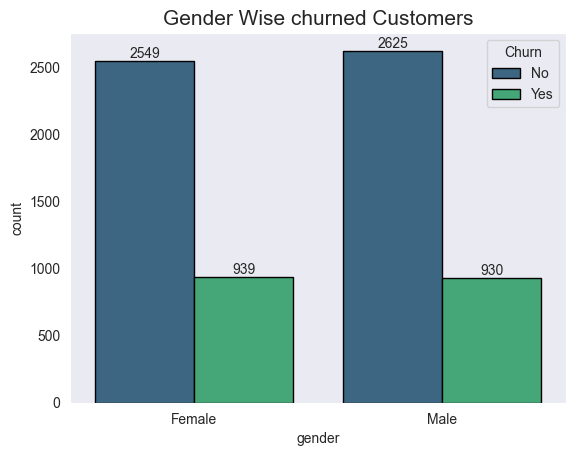

In [356]:
ax= sns.countplot(data=data,x="gender",hue="Churn",palette="viridis",edgecolor="black")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Gender Wise churned Customers",fontsize=15) 
sns.set_style(style="whitegrid") 
plt.show()

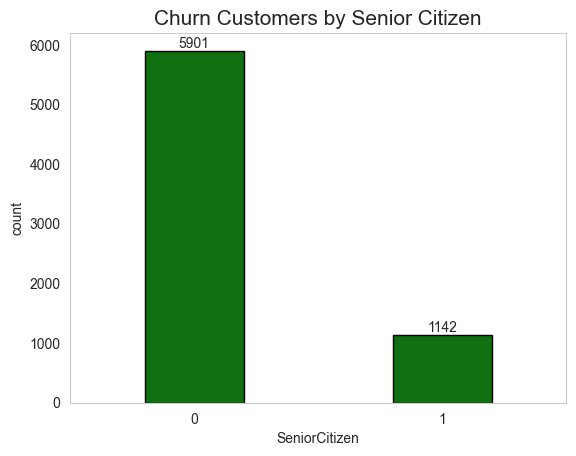

In [363]:
ax=sns.countplot(data=data,x="SeniorCitizen",color="green",width=0.4,edgecolor="black")
ax.bar_label(ax.containers[0]) 
plt.title("Churn Customers by Senior Citizen",fontsize=15)  
plt.grid(False)

plt.show()

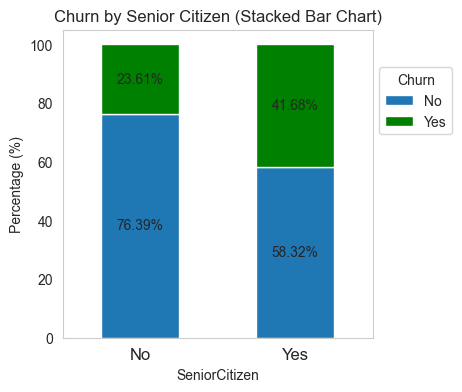

In [361]:
total_counts = data.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack() * 100

# Plot
fig, ax = plt.subplots(figsize=(4, 4))  # Adjust figsize for better visualization

# Plot the bars
total_counts.plot(kind='bar', stacked=True, ax=ax, color=['#1f77b4', 'green'])  # Customize colors if desired

# Add percentage labels on the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.2f}
    %', ha='center', va='center')

plt.title('Churn by Senior Citizen (Stacked Bar Chart)')
plt.xlabel('SeniorCitizen')
plt.ylabel('Percentage (%)')
ax.set_xticklabels(['No', 'Yes'], fontsize=12) 
plt.xticks(rotation=0)
plt.legend(title='Churn', bbox_to_anchor = (1,0.9))  # Customize legend location
plt.grid(False)

plt.show()

#comparatively a greater number of Seniorcitizen have churned

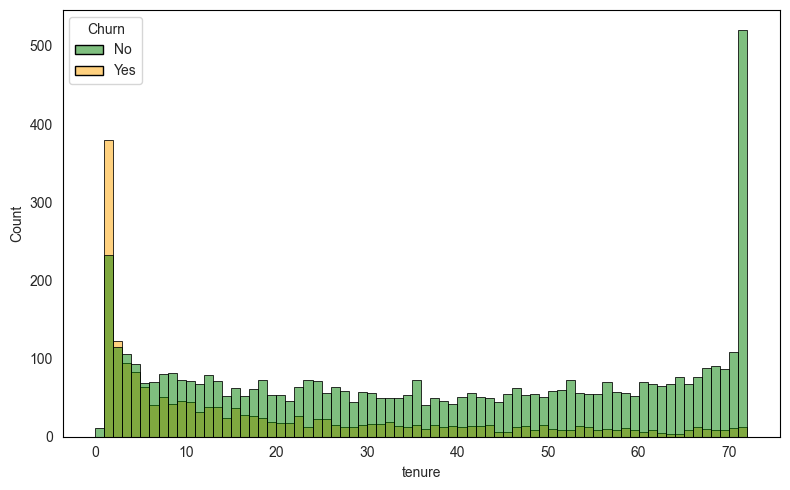

In [360]:
col =["green","orange"]
plt.figure(figsize=(8,5))
sns.histplot(data=data,x='tenure',hue="Churn",edgecolor = "black",palette=col,bins=72)
sns.set_style(style=None) 
plt.gca().spines['top'].set_edgecolor('black')
plt.gca().spines['bottom'].set_edgecolor('black')
plt.gca().spines['left'].set_edgecolor('black')
plt.gca().spines['right'].set_edgecolor('black')
plt.tight_layout()
plt.grid(False)
plt.show()


#Customers who have used our services for a long time have stayed and customers who have used our services 1 or 2 months have churned out

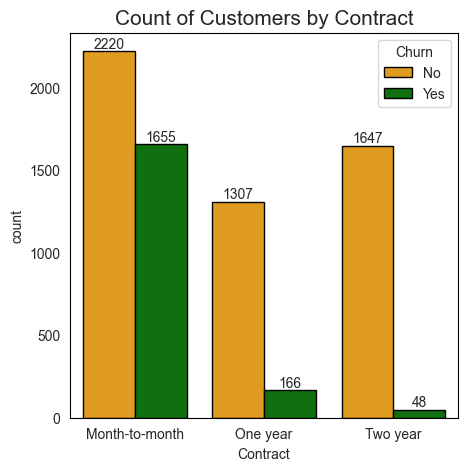

In [365]:
col = ["orange","green"]
plt.figure(figsize=(5,5))
ax=sns.countplot(data=data,x="Contract",hue="Churn",palette=col,edgecolor= "black")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.gca().spines['top'].set_edgecolor('black')
plt.gca().spines['bottom'].set_edgecolor('black')
plt.gca().spines['left'].set_edgecolor('black')
plt.gca().spines['right'].set_edgecolor('black')
plt.title("Count of Customers by Contract",fontsize=15)
plt.grid(False)

plt.show()

#People who have month to month contract are likely to churn then from those who have one or two years of  contract.

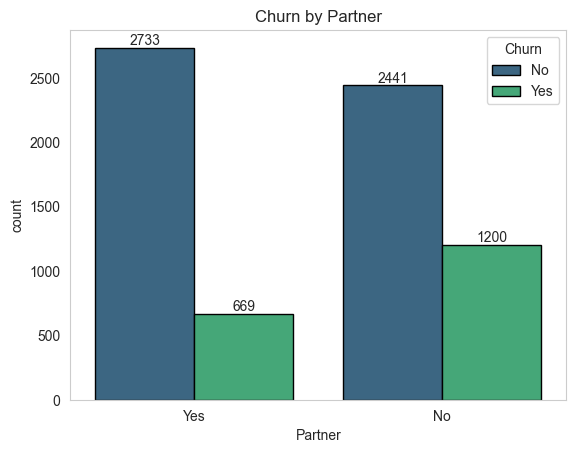

In [366]:
ax=sns.countplot(data=data,x="Partner",hue="Churn",palette="viridis",edgecolor= "black")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churn by Partner")
plt.grid(False)

plt.show()

#customers who don't have partner have churned more than those who have partners.

In [283]:
data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

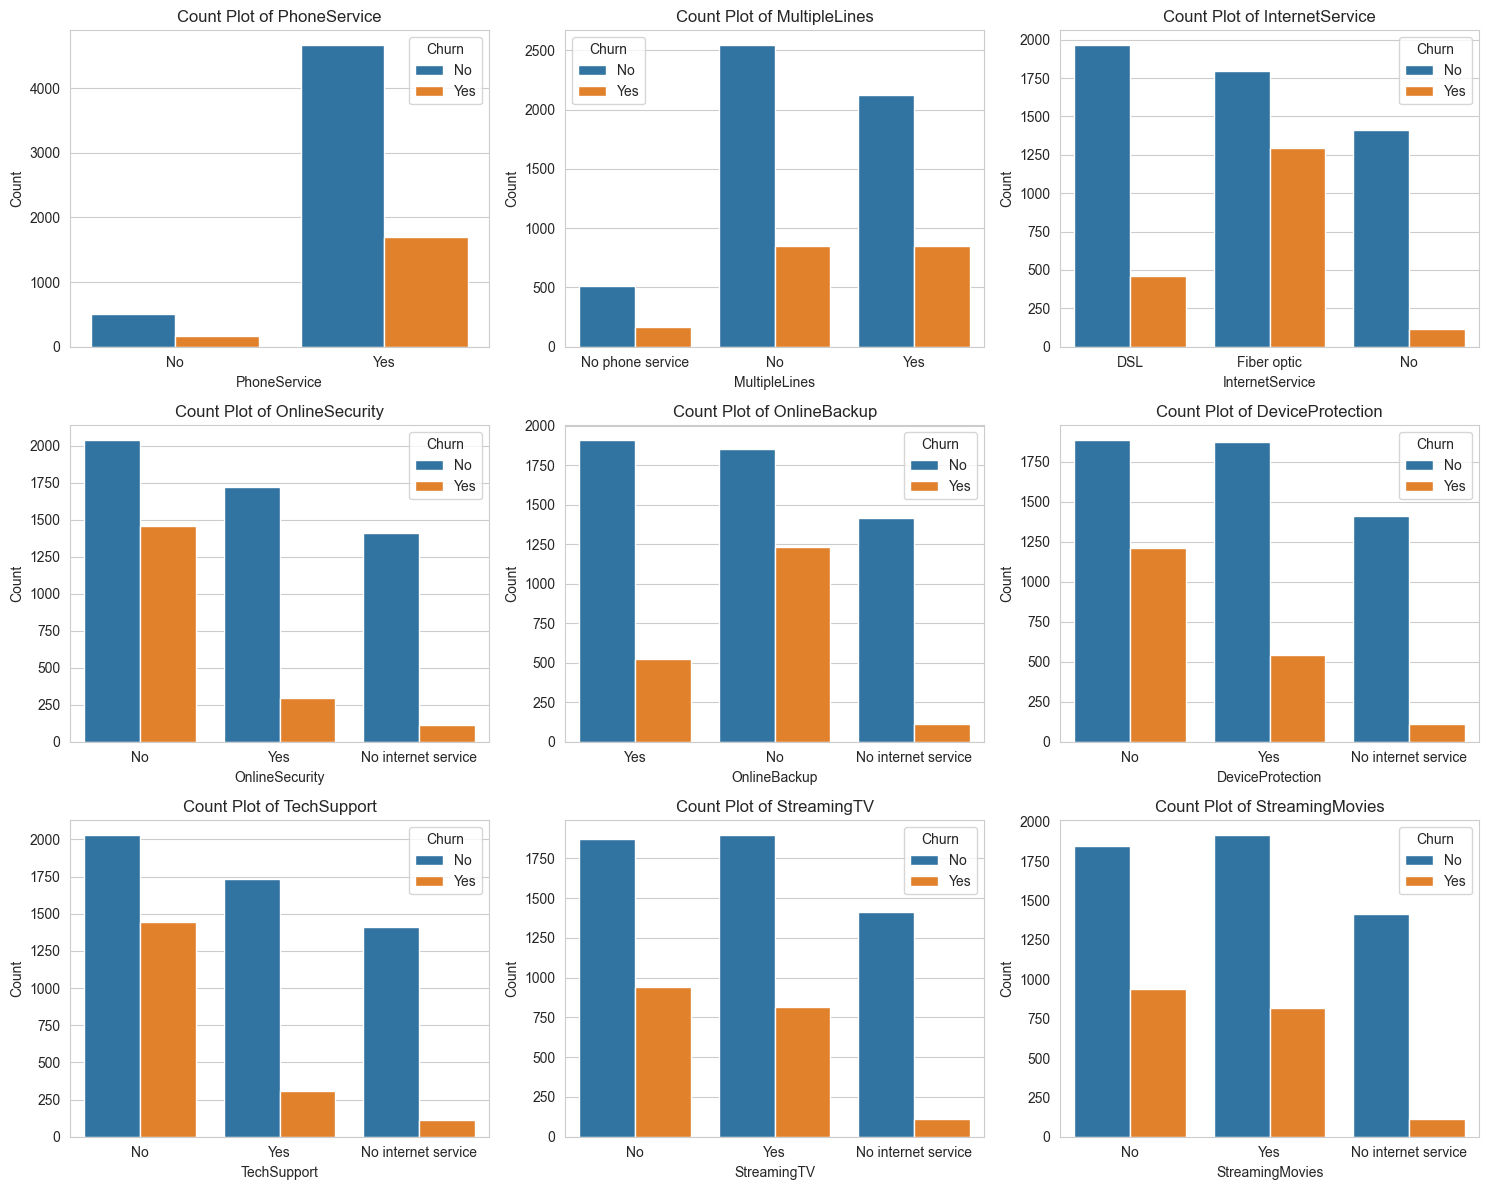

In [369]:
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Number of columns for the subplot grid (you can change this)
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  # Adjust figsize as needed

# Flatten the axes array for easy iteration (handles both 1D and 2D arrays)
axes = axes.flatten()

# Iterate over columns and plot count plots
for i, col in enumerate(columns):
    sns.countplot(x=col, data=data, ax=axes[i], hue = data["Churn"])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.grid(False)

plt.show()

#The majority of customers who do not churn tend to have services like PhoneService, InternetService (particularly DSL), and OnlineSecurity enabled. For services like OnlineBackup, TechSupport, and StreamingTV, churn rates are noticeably higher when these services are not used or are unavailable.

In [296]:
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


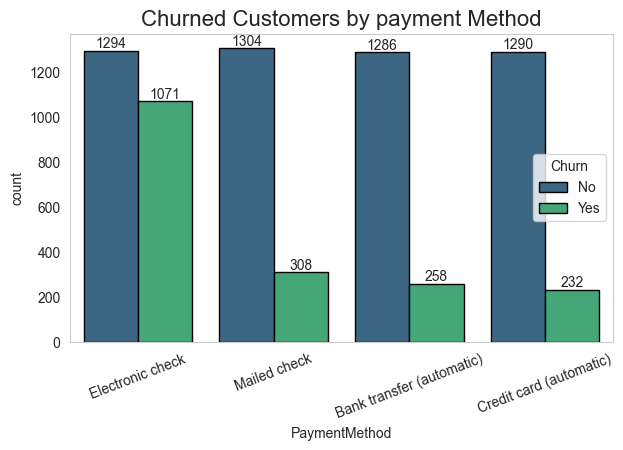

In [370]:
plt.figure(figsize=(7,4))
ax = sns.countplot(data=data,x="PaymentMethod",hue="Churn",palette="viridis",edgecolor= "black")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks(rotation=21)
plt.title("Churned Customers by payment Method",fontsize=16)
plt.grid(False)

plt.show()

#customer are churned more when they are using electronic check as a payment method